In [1]:
from selenium import webdriver

In [23]:
driver = webdriver.Chrome('D:\작업\chromedriver\chromedriver')
driver.get('http://www.opinet.co.kr/searRgSelect.do')

In [24]:
driver.get('http://www.opinet.co.kr/searRgSelect.do')

In [36]:
gu_list_raw = driver.find_element_by_xpath('//*[@id="SIGUNGU_NM0"]')
gu_list = gu_list_raw.find_elements_by_tag_name('option')

In [37]:
gu_names = [option.get_attribute('value') for option in gu_list]

In [42]:
gu_names.remove('')

In [43]:
gu_names

['강남구',
 '강동구',
 '강북구',
 '강서구',
 '관악구',
 '광진구',
 '구로구',
 '금천구',
 '노원구',
 '도봉구',
 '동대문구',
 '동작구',
 '마포구',
 '서대문구',
 '서초구',
 '성동구',
 '성북구',
 '송파구',
 '양천구',
 '영등포구',
 '용산구',
 '은평구',
 '종로구',
 '중구',
 '중랑구']

In [46]:
element = driver.find_element_by_id('SIGUNGU_NM0')
element.send_keys(gu_names[0])

In [47]:
element_sel_gu = driver.find_element_by_xpath('//*[@id="searRgSelect"]').click()

In [48]:
driver.find_element_by_xpath('//*[@id="glopopd_excel"]').click()

In [50]:
import time
from tqdm import tqdm_notebook

for gu in tqdm_notebook(gu_names):
    element = driver.find_element_by_id('SIGUNGU_NM0')
    element.send_keys(gu)
    
    time.sleep(2)
    
    element_sel_gu = driver.find_element_by_xpath('//*[@id="searRgSelect"]').click()
    
    time.sleep(1)
    
    driver.find_element_by_xpath('//*[@id="glopopd_excel"]').click()
    
    time.sleep(1)

In [51]:
driver.close()

In [52]:
import pandas as pd
from glob import glob

In [55]:
station_files = glob('source/04.주유소예제/지역*.xls')
station_files

['source/04.주유소예제\\지역_위치별(주유소) (1).xls',
 'source/04.주유소예제\\지역_위치별(주유소) (10).xls',
 'source/04.주유소예제\\지역_위치별(주유소) (11).xls',
 'source/04.주유소예제\\지역_위치별(주유소) (12).xls',
 'source/04.주유소예제\\지역_위치별(주유소) (13).xls',
 'source/04.주유소예제\\지역_위치별(주유소) (14).xls',
 'source/04.주유소예제\\지역_위치별(주유소) (15).xls',
 'source/04.주유소예제\\지역_위치별(주유소) (16).xls',
 'source/04.주유소예제\\지역_위치별(주유소) (17).xls',
 'source/04.주유소예제\\지역_위치별(주유소) (18).xls',
 'source/04.주유소예제\\지역_위치별(주유소) (19).xls',
 'source/04.주유소예제\\지역_위치별(주유소) (2).xls',
 'source/04.주유소예제\\지역_위치별(주유소) (20).xls',
 'source/04.주유소예제\\지역_위치별(주유소) (21).xls',
 'source/04.주유소예제\\지역_위치별(주유소) (22).xls',
 'source/04.주유소예제\\지역_위치별(주유소) (23).xls',
 'source/04.주유소예제\\지역_위치별(주유소) (24).xls',
 'source/04.주유소예제\\지역_위치별(주유소) (3).xls',
 'source/04.주유소예제\\지역_위치별(주유소) (4).xls',
 'source/04.주유소예제\\지역_위치별(주유소) (5).xls',
 'source/04.주유소예제\\지역_위치별(주유소) (6).xls',
 'source/04.주유소예제\\지역_위치별(주유소) (7).xls',
 'source/04.주유소예제\\지역_위치별(주유소) (8).xls',
 'source/04.주유소예제\\지역_위치별(주유소) (9).xls',
 

In [62]:
tmp_file = []
for file in station_files:
    df = pd.read_excel(file, header=2)
    tmp_file.append(df)
tmp_file

[       지역                    상호                         주소      상표  \
 0   서울특별시                구천면주유소      서울 강동구 구천면로 357 (암사동)  현대오일뱅크   
 1   서울특별시        SK네트웍스 명일셀프주유소       서울 강동구 고덕로 168 (명일동)   SK에너지   
 2   서울특별시    SK네트웍스㈜암사주유소(self)      서울 강동구 올림픽로 749 (암사동)   SK에너지   
 3   서울특별시         지에스칼텍스㈜ 신월주유소     서울 강동구 양재대로 1323 (성내동)   GS칼텍스   
 4   서울특별시               방아다리주유소       서울 강동구 동남로 811 (명일동)   SK에너지   
 5   서울특별시               고속셀프주유소           서울 강동구 천호대로 1246   SK에너지   
 6   서울특별시        지에스칼텍스㈜ 동서울주유소     서울 강동구 천호대로 1456 (상일동)   GS칼텍스   
 7   서울특별시              sk해뜨는주유소   서울특별시 강동구  상일로 132 (강일동)   SK에너지   
 8   서울특별시               천호현대주유소        서울 강동구 천중로 67 (천호동)  현대오일뱅크   
 9   서울특별시       대성석유(주)직영 길동주유소           서울 강동구 천호대로 1168   GS칼텍스   
 10  서울특별시  (주)소모에너지엔테크놀러지 성내주유소      서울 강동구 올림픽로 578 (성내동)   GS칼텍스   
 11  서울특별시       (주)퍼스트오일 코알라주유소  서울특별시 강동구  올림픽로 556 (성내동)   S-OIL   
 12  서울특별시      주)지유에너지직영 오렌지주유소       서울 강동구 성안로 102 (성내동)   SK에너지   
 13  서

In [65]:
station_raw = pd.concat(tmp_file)
station_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 501 entries, 0 to 41
Data columns (total 10 columns):
지역       501 non-null object
상호       501 non-null object
주소       501 non-null object
상표       501 non-null object
전화번호     501 non-null object
셀프여부     501 non-null object
고급휘발유    501 non-null object
휘발유      501 non-null object
경유       501 non-null object
실내등유     501 non-null object
dtypes: object(10)
memory usage: 43.1+ KB


In [66]:
station_raw.head()

,지역,상호,주소,상표,전화번호,셀프여부,고급휘발유,휘발유,경유,실내등유
0,서울특별시,구천면주유소,서울 강동구 구천면로 357 (암사동),현대오일뱅크,02-441-0536,N,-,1354,1167,-
1,서울특별시,SK네트웍스 명일셀프주유소,서울 강동구 고덕로 168 (명일동),SK에너지,02-3428-1739,N,1585,1355,1169,-
2,서울특별시,SK네트웍스㈜암사주유소(self),서울 강동구 올림픽로 749 (암사동),SK에너지,02-3427-2043,Y,1639,1359,1179,-
3,서울특별시,지에스칼텍스㈜ 신월주유소,서울 강동구 양재대로 1323 (성내동),GS칼텍스,02-475-2600,N,1573,1373,1186,1000
4,서울특별시,방아다리주유소,서울 강동구 동남로 811 (명일동),SK에너지,02-442-5145,Y,-,1379,1199,1160


In [67]:
stations = pd.DataFrame({'Oil_store': station_raw['상호'],
                        '주소': station_raw['주소'],
                        '가격': station_raw['휘발유'],
                        '셀프': station_raw['셀프여부'],
                        '상표': station_raw['상표']})
stations.head()

,Oil_store,주소,가격,셀프,상표
0,구천면주유소,서울 강동구 구천면로 357 (암사동),1354,N,현대오일뱅크
1,SK네트웍스 명일셀프주유소,서울 강동구 고덕로 168 (명일동),1355,N,SK에너지
2,SK네트웍스㈜암사주유소(self),서울 강동구 올림픽로 749 (암사동),1359,Y,SK에너지
3,지에스칼텍스㈜ 신월주유소,서울 강동구 양재대로 1323 (성내동),1373,N,GS칼텍스
4,방아다리주유소,서울 강동구 동남로 811 (명일동),1379,Y,SK에너지


In [81]:
stations['구'] = [address.split()[1] for address in stations['주소']]

In [99]:
stations['구'].value_counts()

강남구     42
서초구     36
강서구     34
송파구     33
영등포구    32
양천구     26
성북구     24
구로구     22
동대문구    21
도봉구     18
은평구     17
성동구     17
광진구     17
강동구     16
관악구     16
중랑구     16
서대문구    15
노원구     15
용산구     14
금천구     13
강북구     13
마포구     13
중구      12
동작구     10
종로구      9
Name: 구, dtype: int64

In [109]:
stations.drop(stations.query('가격=="-"').index, axis=0, inplace=True)

In [111]:
stations.가격.unique()

array([1354, 1355, 1359, 1373, 1379, 1380, 1398, 1399, 1428, 1518, 1528,
       1764, 1262, 1265, 1285, 1295, 1297, 1327, 1347, 1358, 1456, 1595,
       1299, 1369, 1397, 1429, 1565, '1427', '1437', '1438', '1487',
       '1489', '1589', '1599', '1629', '1699', '1769', 1324, 1329, 1335,
       1680, 1917, 1280, 1375, 1377, 1388, 1390, 1396, 1415, 1417, 1433,
       1438, 1439, 1447, 1449, 1477, 1489, 1499, 1845, 1857, 1868, 1878,
       1286, 1308, 1326, 1338, 1348, 1395, 1409, 1627, 1630, 1698, 1227,
       1237, 1245, 1266, 1267, 1269, 1275, 1277, 1278, 1279, 1287, 1318,
       1339, 1406, 1357, 1363, 1365, 1385, 1391, 1392, 1413, 1435, 1459,
       1599, 1236, 1251, 1258, 1284, 1309, 1310, 1316, 1419, 1469, 1483,
       1519, 1687, 1298, 1319, 1349, 1588, 1757, 1790, 1890, 1919, 1936,
       1289, 1558, 1620, 1639, 1799, 1884, 1948, 1985, 1990, 1998, 1999,
       2059, '1259', '1275', '1277', '1279', '1285', '1297', '1319',
       '1325', '1328', '1335', '1348', '1398', 1352, 1445, 

In [115]:
stations['가격'] = stations.가격.astype('float')

In [117]:
stations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 464 entries, 0 to 39
Data columns (total 6 columns):
Oil_store    464 non-null object
주소           464 non-null object
가격           464 non-null float64
셀프           464 non-null object
상표           464 non-null object
구            464 non-null object
dtypes: float64(1), object(5)
memory usage: 25.4+ KB


UsageError: Line magic function `%%timeit` not found.


In [123]:
stations.reset_index(inplace=True, drop=True)
stations

,Oil_store,주소,가격,셀프,상표,구
0,구천면주유소,서울 강동구 구천면로 357 (암사동),1354.0,N,현대오일뱅크,강동구
1,SK네트웍스 명일셀프주유소,서울 강동구 고덕로 168 (명일동),1355.0,N,SK에너지,강동구
2,SK네트웍스㈜암사주유소(self),서울 강동구 올림픽로 749 (암사동),1359.0,Y,SK에너지,강동구
3,지에스칼텍스㈜ 신월주유소,서울 강동구 양재대로 1323 (성내동),1373.0,N,GS칼텍스,강동구
4,방아다리주유소,서울 강동구 동남로 811 (명일동),1379.0,Y,SK에너지,강동구
...,...,...,...,...,...,...
459,갤러리아주유소,서울 강남구 압구정로 426 (청담동),1862.0,N,SK에너지,강남구
460,오천주유소,서울 강남구 봉은사로 503 (삼성동),1865.0,N,SK에너지,강남구
461,(주)만정에너지,서울 강남구 봉은사로 433 (삼성동),1869.0,N,GS칼텍스,강남구
462,금성주유소,서울 강남구 테헤란로 619 (삼성동),1895.0,N,SK에너지,강남구


In [126]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import platform

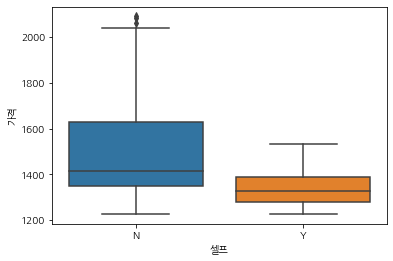

In [128]:
sns.boxplot('셀프', '가격', data=stations)

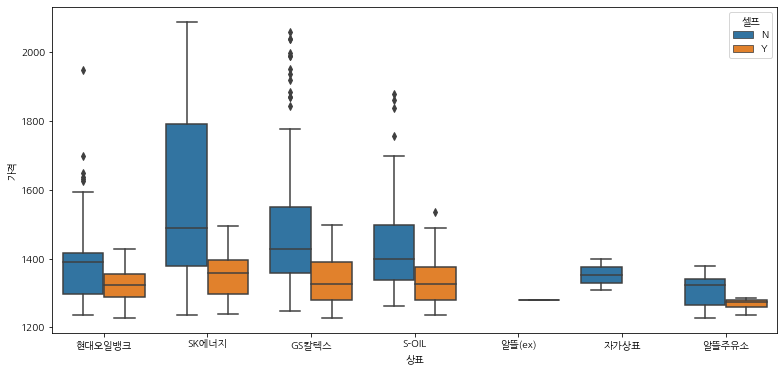

In [136]:
plt.figure(figsize=(13, 6))
sns.boxplot('상표', '가격', hue='셀프', data=stations)

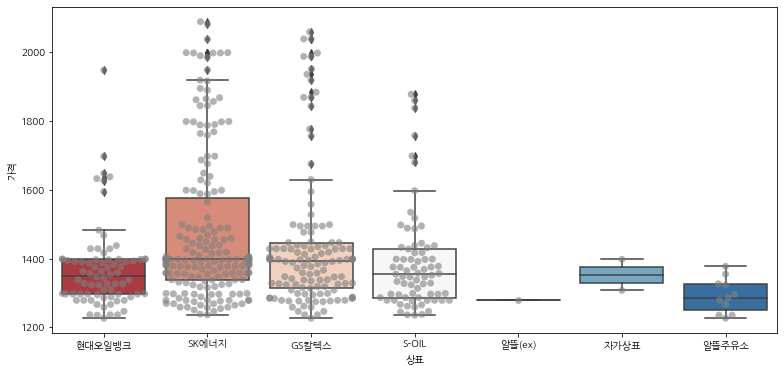

In [167]:
plt.figure(figsize=(13, 6))
sns.boxplot('상표', '가격', data=stations, palette='RdBu')
sns.swarmplot('상표', '가격', data=stations, color='.5', alpha=.6, s=7)
plt.show();

In [178]:
stations.groupby('구').mean().sort_values('가격', ascending=False).style.background_gradient('summer_r')

,가격
구,
중구,1865.5
용산구,1859.62
종로구,1694.44
강남구,1602.24
마포구,1540.75
서초구,1472.18
영등포구,1460.27
강동구,1431.33
관악구,1422.2


In [180]:
import json
import folium
import googlemaps
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [184]:
stations.sort_values('가격', ascending=False)

,Oil_store,주소,가격,셀프,상표,구
286,서남주유소,서울 중구 통일로 30,2089.0,N,SK에너지,중구
463,뉴서울(강남),서울 강남구 언주로 716 (논현동),2082.0,N,SK에너지,강남구
250,서계주유소,서울 용산구 청파로 367 (서계동),2059.0,N,GS칼텍스,용산구
284,필동주유소,서울 중구 퇴계로 196 (필동2가),2039.0,N,GS칼텍스,중구
285,에스씨(주) 역전주유소,서울 중구 퇴계로 15,2039.0,N,GS칼텍스,중구
...,...,...,...,...,...,...
302,뉴신정주유소,서울 강서구 곰달래로 207(화곡동),1236.0,N,알뜰주유소,강서구
172,현대주유소,서울 양천구 남부순환로 372 (신월동),1236.0,Y,S-OIL,양천구
119,(주)삼표에너지 정릉주유소,서울 성북구 보국문로 35 (정릉동),1227.0,Y,GS칼텍스,성북구
121,원천주유소,서울 성북구 돌곶이로 142 (장위동),1227.0,N,알뜰주유소,성북구


In [189]:
import numpy as np
pd.pivot_table(data=stations, values='가격', index='구')

,가격
구,
강남구,1602.236842
강동구,1431.333333
강북구,1271.666667
강서구,1360.000000
관악구,1422.200000
광진구,1327.533333
구로구,1392.750000
금천구,1341.583333
노원구,1382.714286


In [195]:
gu_data = pd.pivot_table(data=stations, values='가격', index='구', aggfunc=np.mean).sort_values('가격', ascending=False)
gu_data.head()

,가격
구,
중구,1865.500000
용산구,1859.615385
종로구,1694.444444
강남구,1602.236842
마포구,1540.750000


In [209]:
geo_path = 'source/02. skorea_municipalities_geo_simple.json'
geo_data = json.load(open(geo_path, encoding='utf-8'))

map = folium.Map(location=[37.5502, 126.982], zoom_start=10.5, tiles='Stamen Watercolor')

map.choropleth(geo_data = geo_data,
              data = gu_data,
              columns=[gu_data.index, '가격'],
              fill_color='PuRd',
              key_on='feature.id')
map

In [218]:
oil_price_top10 = stations.sort_values('가격', ascending=False).head(10)
oil_price_top10

,Oil_store,주소,가격,셀프,상표,구
286,서남주유소,서울 중구 통일로 30,2089.0,N,SK에너지,중구
463,뉴서울(강남),서울 강남구 언주로 716 (논현동),2082.0,N,SK에너지,강남구
250,서계주유소,서울 용산구 청파로 367 (서계동),2059.0,N,GS칼텍스,용산구
284,필동주유소,서울 중구 퇴계로 196 (필동2가),2039.0,N,GS칼텍스,중구
285,에스씨(주) 역전주유소,서울 중구 퇴계로 15,2039.0,N,GS칼텍스,중구
283,장충주유소,서울 중구 장충단로 202 (장충동1가),2038.0,N,SK에너지,중구
249,갈월동주유소,서울 용산구 한강대로 322 (갈월동),1999.0,N,SK에너지,용산구
282,SK에너지(주) 퇴계로주유소,서울 중구 퇴계로 228 (필동2가),1999.0,N,SK에너지,중구
248,에너비스,서울 용산구 한남대로 82 (한남동),1998.0,N,SK에너지,용산구
247,한남지점,서울 용산구 한남대로21길 4 (한남동),1998.0,N,SK에너지,용산구


In [219]:
oil_price_bottom10 = stations.sort_values('가격', ascending=False).tail(10)
oil_price_bottom10

,Oil_store,주소,가격,셀프,상표,구
228,수유동주유소,서울 강북구 도봉로 395 (수유동),1237.0,Y,GS칼텍스,강북구
227,(주)석산에너지,서울 강북구 삼양로 316 (수유동),1237.0,Y,현대오일뱅크,강북구
226,북서울고속주유소,서울 강북구 삼양로 410 (수유동),1237.0,Y,S-OIL,강북구
173,형산석유(주)원주유소,서울 양천구 남부순환로 408,1236.0,N,현대오일뱅크,양천구
303,화곡역주유소,서울특별시 강서구 강서로 154 (화곡동),1236.0,Y,알뜰주유소,강서구
302,뉴신정주유소,서울 강서구 곰달래로 207(화곡동),1236.0,N,알뜰주유소,강서구
172,현대주유소,서울 양천구 남부순환로 372 (신월동),1236.0,Y,S-OIL,양천구
119,(주)삼표에너지 정릉주유소,서울 성북구 보국문로 35 (정릉동),1227.0,Y,GS칼텍스,성북구
121,원천주유소,서울 성북구 돌곶이로 142 (장위동),1227.0,N,알뜰주유소,성북구
120,강산제2주유소,서울 성북구 보국문로 52,1227.0,Y,현대오일뱅크,성북구


In [214]:
gmap_key='******'

In [215]:
gmaps = googlemaps.Client(key=gmap_key)

In [238]:
from tqdm import tqdm_notebook
lat = []
lng = []
for n in tqdm_notebook(oil_price_top10.index):
    try:
        tmp_add = str(oil_price_top10['주소'][n]).split('(')[0]
        tmp_map = gmaps.geocode(tmp_add)
        
        tmp_loc = tmp_map[0].get('geometry')
        lat.append(tmp_loc['location']['lat'])
        lng.append(tmp_loc['location']['lng'])
    except:
        lat.append(np.nan)
        lng.append(np.nan)
        print('here is nan!')
oil_price_top10['lat'] = lat
oil_price_top10['lng'] = lng

In [239]:
oil_price_top10

,Oil_store,주소,가격,셀프,상표,구,lat,lng
286,서남주유소,서울 중구 통일로 30,2089.0,N,SK에너지,중구,37.558348,126.972090
463,뉴서울(강남),서울 강남구 언주로 716 (논현동),2082.0,N,SK에너지,강남구,37.517636,127.035756
250,서계주유소,서울 용산구 청파로 367 (서계동),2059.0,N,GS칼텍스,용산구,37.552290,126.968935
284,필동주유소,서울 중구 퇴계로 196 (필동2가),2039.0,N,GS칼텍스,중구,37.560850,126.993653
285,에스씨(주) 역전주유소,서울 중구 퇴계로 15,2039.0,N,GS칼텍스,중구,37.557001,126.974495
283,장충주유소,서울 중구 장충단로 202 (장충동1가),2038.0,N,SK에너지,중구,37.562719,127.007010
249,갈월동주유소,서울 용산구 한강대로 322 (갈월동),1999.0,N,SK에너지,용산구,37.546955,126.972218
282,SK에너지(주) 퇴계로주유소,서울 중구 퇴계로 228 (필동2가),1999.0,N,SK에너지,중구,37.561648,126.997142
248,에너비스,서울 용산구 한남대로 82 (한남동),1998.0,N,SK에너지,용산구,37.535952,127.006130
247,한남지점,서울 용산구 한남대로21길 4 (한남동),1998.0,N,SK에너지,용산구,37.534657,127.006063


In [240]:
lat = []
lng = []
for n in tqdm_notebook(oil_price_bottom10.index):
    try:
        tmp_add = str(oil_price_bottom10['주소'][n]).split('(')[0]
        tmp_map = gmaps.geocode(tmp_add)
        
        tmp_loc = tmp_map[0].get('geometry')
        lat.append(tmp_loc['location']['lat'])
        lng.append(tmp_loc['location']['lng'])
    except:
        lat.append(np.nan)
        lng.append(np.nan)
        print('here is nan!')
oil_price_bottom10['lat'] = lat
oil_price_bottom10['lng'] = lng
oil_price_bottom10

,Oil_store,주소,가격,셀프,상표,구,lat,lng
228,수유동주유소,서울 강북구 도봉로 395 (수유동),1237.0,Y,GS칼텍스,강북구,37.642140,127.029568
227,(주)석산에너지,서울 강북구 삼양로 316 (수유동),1237.0,Y,현대오일뱅크,강북구,37.631582,127.017939
226,북서울고속주유소,서울 강북구 삼양로 410 (수유동),1237.0,Y,S-OIL,강북구,37.640155,127.017203
173,형산석유(주)원주유소,서울 양천구 남부순환로 408,1236.0,N,현대오일뱅크,양천구,37.531003,126.831022
303,화곡역주유소,서울특별시 강서구 강서로 154 (화곡동),1236.0,Y,알뜰주유소,강서구,37.540657,126.841506
302,뉴신정주유소,서울 강서구 곰달래로 207(화곡동),1236.0,N,알뜰주유소,강서구,37.531554,126.856024
172,현대주유소,서울 양천구 남부순환로 372 (신월동),1236.0,Y,S-OIL,양천구,37.533811,126.829240
119,(주)삼표에너지 정릉주유소,서울 성북구 보국문로 35 (정릉동),1227.0,Y,GS칼텍스,성북구,37.607660,127.009858
121,원천주유소,서울 성북구 돌곶이로 142 (장위동),1227.0,N,알뜰주유소,성북구,37.614921,127.052752
120,강산제2주유소,서울 성북구 보국문로 52,1227.0,Y,현대오일뱅크,성북구,37.609163,127.010074


In [262]:
lat_mean = np.mean([oil_price_top10.lat, oil_price_bottom10.lat])
lng_mean = np.mean([oil_price_top10.lng, oil_price_bottom10.lng])
map = folium.Map([lat_mean, lng_mean], zoom_start=11, tiles='Stamen Watercolor')

for n in oil_price_top10.index:
    if pd.notnull(oil_price_top10['lat'][n]):
        folium.CircleMarker([oil_price_top10['lat'][n], oil_price_top10['lng'][n]], 
                                  radius=15, color='#CD3181', 
                                  fill_color='#CD3181',
                                  fill=True).add_to(map)
    
for n in oil_price_bottom10.index:
    if pd.notnull(oil_price_bottom10['lat'][n]): 
        folium.CircleMarker([oil_price_bottom10['lat'][n], 
                                  oil_price_bottom10['lng'][n]], 
                                  radius=15, color='#3186cc', 
                                  fill_color='#3186cc',
                                  fill=True).add_to(map)
    
map